In [42]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# Read dataset, provide shape and info 

In [44]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [45]:
customer_df.shape

(9134, 24)

In [61]:
data_types = customer_df.dtypes
print(data_types)

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object


In [46]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [47]:
# Drop 'customer' column (it is an #id column we don't need)

In [48]:
customer_df.drop('Customer', inplace=True, axis=1)
print(customer_df)

           State  Customer Lifetime Value Response  Coverage Education  \
0     Washington              2763.519279       No     Basic  Bachelor   
1        Arizona              6979.535903       No  Extended  Bachelor   
2         Nevada             12887.431650       No   Premium  Bachelor   
3     California              7645.861827       No     Basic  Bachelor   
4     Washington              2813.692575       No     Basic  Bachelor   
...          ...                      ...      ...       ...       ...   
9129  California             23405.987980       No     Basic  Bachelor   
9130  California              3096.511217      Yes  Extended   College   
9131  California              8163.890428       No  Extended  Bachelor   
9132  California              7524.442436       No  Extended   College   
9133  California              2611.836866       No  Extended   College   

     Effective To Date EmploymentStatus Gender  Income Location Code  ...  \
0              2/24/11         Emp

In [49]:
# convert into PE-8 std. by using the dict. with the column names
new_column_names = {
    'Customer': 'customer',
    'State': 'state',
    'Customer Lifetime Value': 'customer_lifetime_value',
    'Response': 'response',
    'Coverage': 'coverage',
    'Education': 'education',
    'Effective To Date': 'effective_to_date',
    'EmploymentStatus': 'employment_status',
    'Gender': 'gender',
    'Income': 'income',
    'Location Code': 'location_code',
    'Marital Status': 'marital_status',
    'Monthly Premium Auto': 'monthly_premium_auto',
    'Months Since Last Claim': 'months_since_last_claim',
    'Months Since Policy Inception': 'months_since_policy_inception',
    'Number of Open Complaints': 'number_of_open_complaints',
    'Number of Policies': 'number_of_policies',
    'Policy Type': 'policy_type',
    'Policy': 'policy',
    'Renew Offer Type': 'renew_offer_type',
    'Sales Channel': 'sales_channel',
    'Total Claim Amount': 'total_claim_amount',
    'Vehicle Class': 'vehicle_class',
    'Vehicle Size': 'vehicle_size'
}

# rename columns using the dictionary
customer_df_2 = customer_df.rename(columns=new_column_names)

In [50]:
customer_df_2

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [51]:
# we can now see that the column names have been formatted as required  

In [52]:
print(customer_df_2.columns)

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


In [53]:
# we obtain the numerical and categorical dataset 

In [54]:
num = customer_df_2.select_dtypes(include=['float64', 'int64'])
num 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [55]:
cat = customer_df_2.select_dtypes(include=['object'])
cat 

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [56]:
date_format_valid = pd.to_datetime(customer_df_2['effective_to_date'], errors='coerce').notnull().all()

In [57]:
if date_format_valid:
    print("The 'Effective To Date' column is properly formatted.")
else:
    print("The 'Effective To Date' column is not properly formatted.")

The 'Effective To Date' column is properly formatted.


In [58]:
# we provide the correlation matrix

In [59]:
correlation_matrix = data.corr()

In [ ]:
# we provide the correlation heatmap 

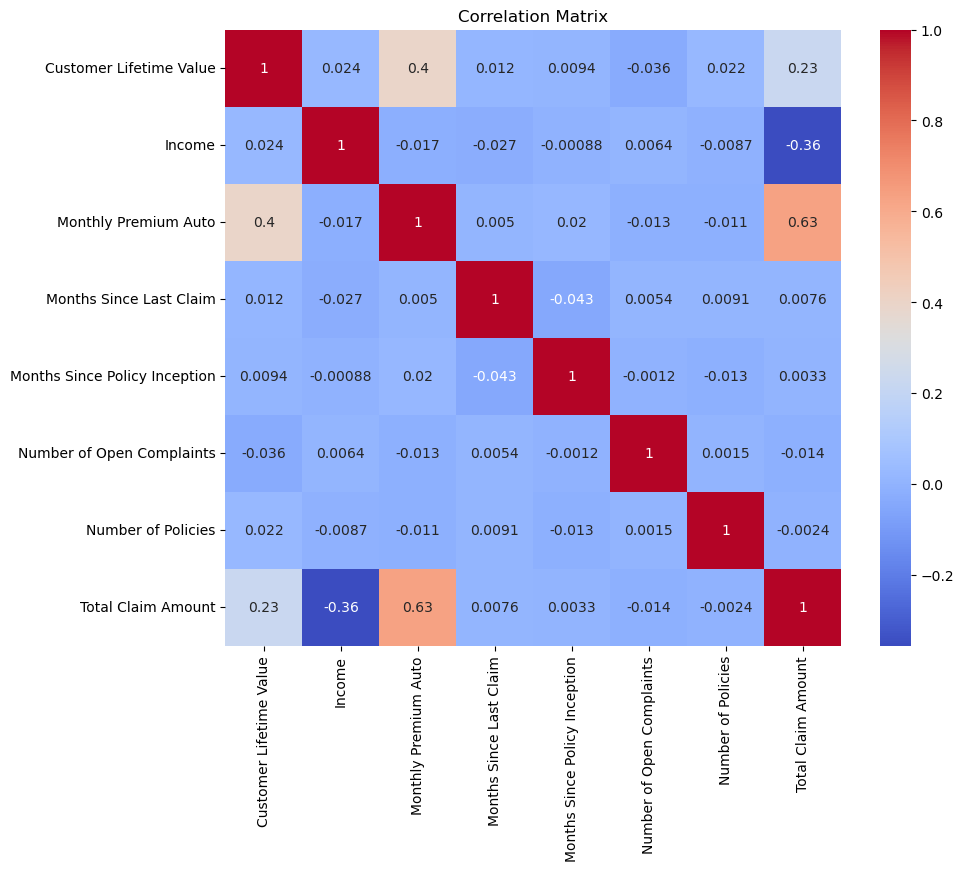

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

from the plot, we see a hight correlation (above 0.6) between total claim amount and monthly premium 

the above means that we may get rid of the 'monthly premium auto' for the regression model, if we are to set 'total claim amount as the target variable'

we see from the data type in the set, that customer lifetime value and total claim amount are numerical continuous varriable ('float 64') vs. the rest of numerical variables, which are 'int 64' d_types

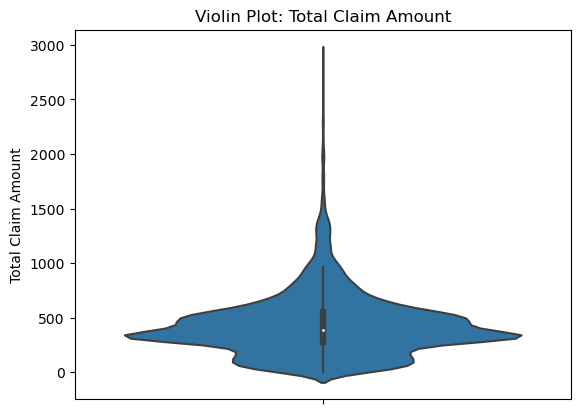

In [78]:
# Create a violin plot for 'Total Claim Amount'
sns.violinplot(data=data, y='Total Claim Amount')
plt.ylabel('Total Claim Amount')
plt.title('Violin Plot: Total Claim Amount')
plt.show()

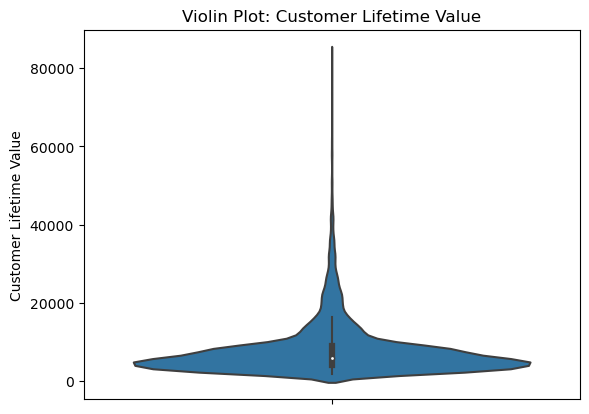

In [79]:
# Create a violin plot for 'Total Claim Amount'
sns.violinplot(data=data, y='Customer Lifetime Value')
plt.ylabel('Customer Lifetime Value')
plt.title('Violin Plot: Customer Lifetime Value')
plt.show()

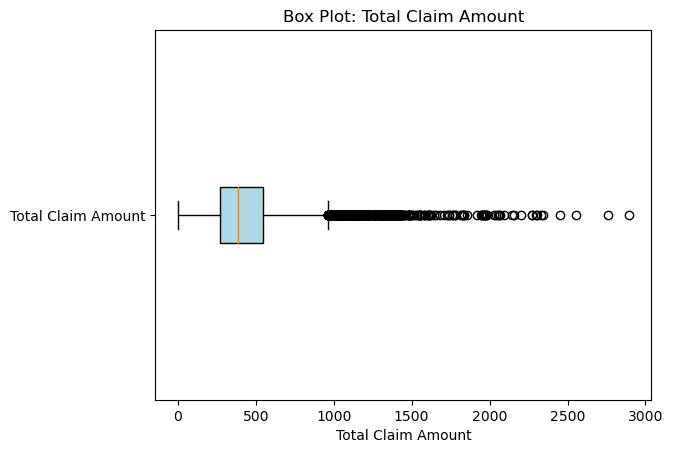

In [73]:
plt.boxplot(data['Total Claim Amount'], vert=False, labels=['Total Claim Amount'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Total Claim Amount')
plt.title('Box Plot: Total Claim Amount')
plt.show()

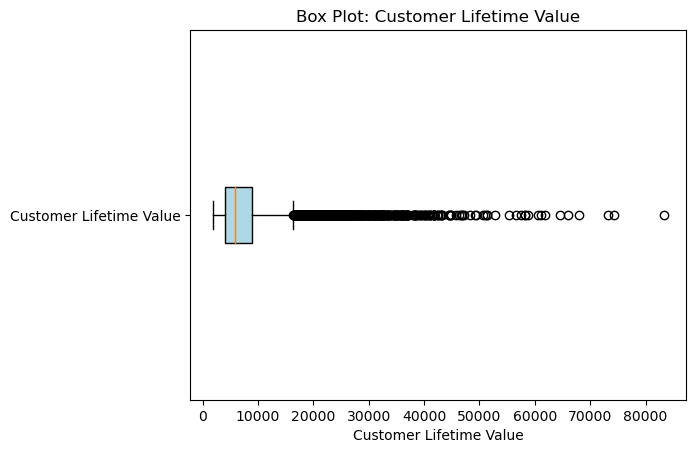

In [74]:
plt.boxplot(data['Customer Lifetime Value'], vert=False, labels=['Customer Lifetime Value'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Customer Lifetime Value')
plt.title('Box Plot: Customer Lifetime Value')
plt.show()

In [75]:
# Calculate the IQR for 'Customer Lifetime Value'
q1 = data['Customer Lifetime Value'].quantile(0.25)
q3 = data['Customer Lifetime Value'].quantile(0.75)
iqr = q3 - q1

# Display the IQR for 'Customer Lifetime Value'
print("IQR Analysis for 'Customer Lifetime Value'")
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)

IQR Analysis for 'Customer Lifetime Value'
Q1: 3994.25179425
Q3: 8962.16704125
IQR: 4967.915247000001


In [76]:
# Calculate the IQR for 'Total Claim Amount'
q1 = data['Total Claim Amount'].quantile(0.25)
q3 = data['Total Claim Amount'].quantile(0.75)
iqr = q3 - q1

# Display the IQR for 'Total Claim Amount'
print("IQR Analysis for 'Total Claim Amount'")
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)

IQR Analysis for 'Total Claim Amount'
Q1: 272.2582445
Q3: 547.51483875
IQR: 275.25659425


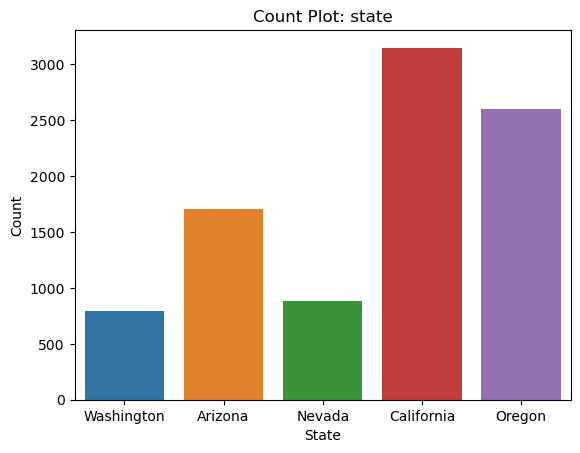

In [81]:
sns.countplot(data=data, x='State')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count Plot: state')
plt.show()

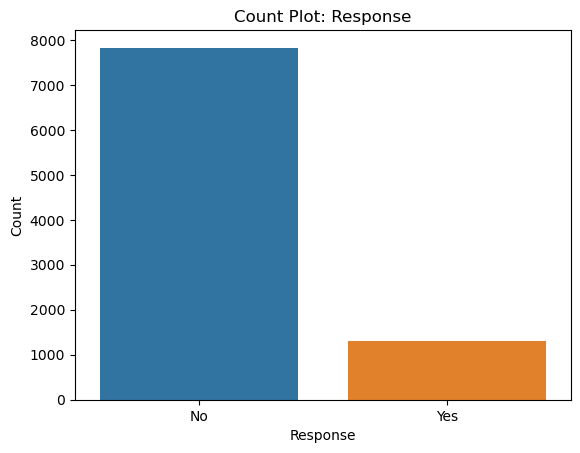

In [82]:
sns.countplot(data=data, x='Response')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Count Plot: Response')
plt.show()

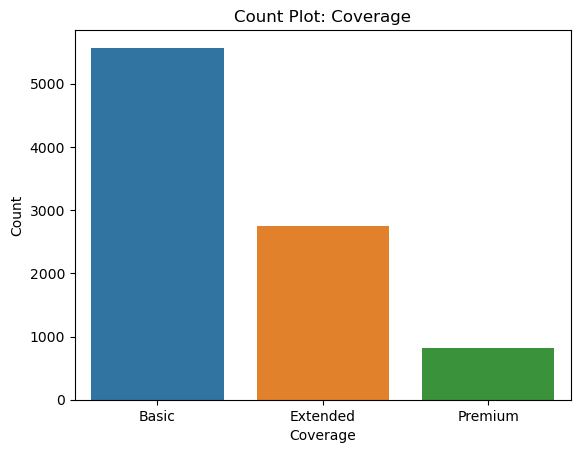

In [83]:
sns.countplot(data=data, x='Coverage')
plt.xlabel('Coverage')
plt.ylabel('Count')
plt.title('Count Plot: Coverage')
plt.show()

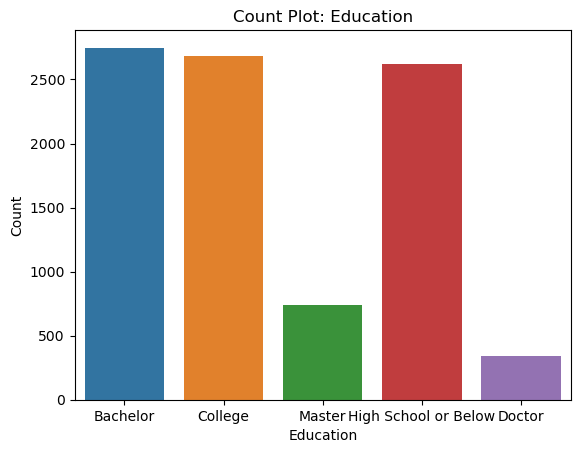

In [84]:
sns.countplot(data=data, x='Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Count Plot: Education')
plt.show()

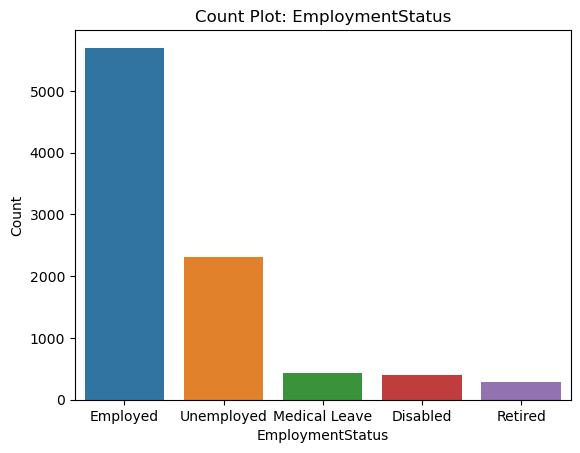

In [86]:
sns.countplot(data=data, x='EmploymentStatus')
plt.xlabel('EmploymentStatus')
plt.ylabel('Count')
plt.title('Count Plot: EmploymentStatus')
plt.show()

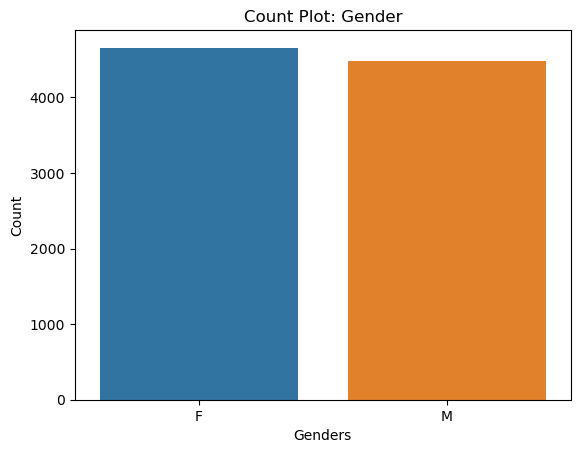

In [87]:
sns.countplot(data=data, x='Gender')
plt.xlabel('Genders')
plt.ylabel('Count')
plt.title('Count Plot: Gender')
plt.show()